In [16]:
import pandas as pd
import numpy as np
titanic=pd.read_csv('7.titanic_data.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [17]:
titanic.shape

(891, 12)

In [20]:
titanic.groupby('Sex')[['Survived']].mean()

,Survived
Sex,
female,0.742038
male,0.188908


In [24]:
# this gives us a better idea of how both gender and class affect survival
titanic.groupby(['Sex','Pclass'])['Survived'].aggregate('mean').unstack()

Pclass,1,2,3
Sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


# Pivot Table Syntax
two dimention group by is more complicated than pivot_table

In [26]:
# this is more rediable than the groupby approach
titanic.pivot_table('Survived',index='Sex',columns='Pclass')

Pclass,1,2,3
Sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


This is eminently more readable than the GroupBy approach, and produces the same result.

As you might expect of an early 20th-century transatlantic cruise, the survival gradient favors both women and higher classes. 

First-class women survived with near certainty (hi, Rose!), while only one in ten third-class men survived (sorry, Jack!)

## Multilevel pivot tables

In [29]:
age=pd.cut(titanic['Age'],[0,18,80])
age.head()

0    (18, 80]
1    (18, 80]
2    (18, 80]
3    (18, 80]
4    (18, 80]
Name: Age, dtype: category
Categories (2, interval[int64]): [(0, 18] < (18, 80]]

In [30]:
titanic.pivot_table('Survived',['Sex',age],'Pclass')

Pclass                  1         2         3
Sex    Age                                   
female (0, 18]   0.909091  1.000000  0.511628
       (18, 80]  0.972973  0.900000  0.423729
male   (0, 18]   0.800000  0.600000  0.215686
       (18, 80]  0.375000  0.071429  0.133663

In [36]:
# we can apply this the same stragety with the columns as well
print('Fare mean: ',titanic['Fare'].mean())
fare=pd.qcut(titanic['Fare'],2)
fare.head()

Fare mean:  32.2042079685746


0     (-0.001, 14.454]
1    (14.454, 512.329]
2     (-0.001, 14.454]
3    (14.454, 512.329]
4     (-0.001, 14.454]
Name: Fare, dtype: category
Categories (2, interval[float64]): [(-0.001, 14.454] < (14.454, 512.329]]

In [37]:
titanic.pivot_table('Survived',['Sex',age],[fare,'Pclass'])

Fare            (-0.001, 14.454]                     (14.454, 512.329]  \
Pclass                         1         2         3                 1   
Sex    Age                                                               
female (0, 18]               NaN  1.000000  0.714286          0.909091   
       (18, 80]              NaN  0.880000  0.444444          0.972973   
male   (0, 18]               NaN  0.000000  0.260870          0.800000   
       (18, 80]              0.0  0.098039  0.125000          0.391304   

Fare                                 
Pclass                  2         3  
Sex    Age                           
female (0, 18]   1.000000  0.318182  
       (18, 80]  0.914286  0.391304  
male   (0, 18]   0.818182  0.178571  
       (18, 80]  0.030303  0.192308

## Additional pivot table options

In [41]:
# call signature as of Pandas 0.18 
# DataFrame.pivot_table(data, values=None, index=None, columns=None,
#                      aggfunc='mean', fill_value=None, margins=False,
#                      dropna=True, margins_name='All')

In [44]:
titanic.pivot_table(index='Sex',columns='Pclass',
                    aggfunc={'Survived':sum})

Survived        
Pclass        1   2   3
Sex                    
female       91  70  72
male         45  17  47

In [45]:
titanic.pivot_table(index='Sex',columns='Pclass',
                    aggfunc={'Survived':sum,'Fare':'mean'})

Fare                       Survived        
Pclass           1          2          3        1   2   3
Sex                                                      
female  106.125798  21.970121  16.118810       91  70  72
male     67.226127  19.741782  12.661633       45  17  47

In [47]:
# compute totals along each grouping : margins keyword
titanic.pivot_table('Survived',index='Sex',columns='Pclass',margins=True)

Pclass,1,2,3,All
Sex,,,,
female,0.968085,0.921053,0.500000,0.742038
male,0.368852,0.157407,0.135447,0.188908
All,0.629630,0.472826,0.242363,0.383838


Here this automatically gives us information about the class-agnostic survival rate by gender, the gender-agnostic survival rate by class, and the overall survival rate of 38%.

The margin label can be specified with the margins_name keyword, which defaults to "All".


Text(0, 0.5, 'Survived')

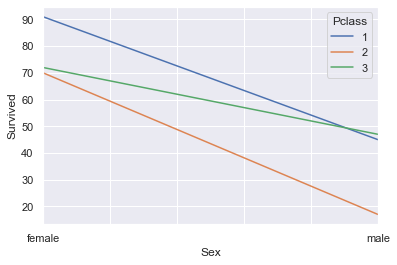

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
titanic.pivot_table('Survived',index='Sex',columns='Pclass',aggfunc='sum').plot()
plt.ylabel('Survived')

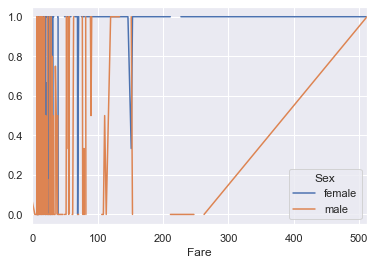

In [54]:
titanic.pivot_table('Survived',index='Fare',columns='Sex',aggfunc='mean').plot()

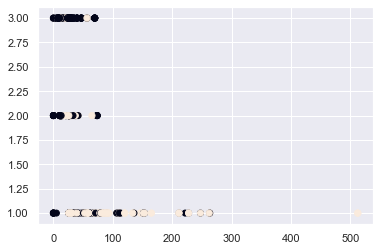

In [61]:
plt.scatter(titanic['Fare'],titanic['Pclass'],c=titanic['Survived'])